In [1]:
#pip install tensorflow

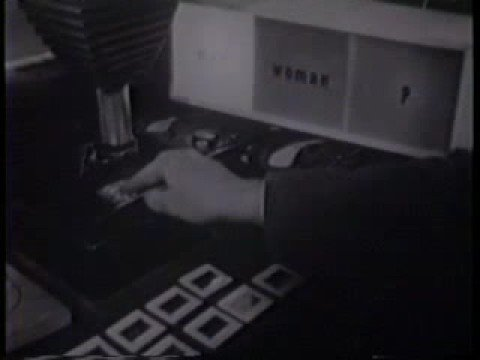

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

Rencent versions of TensorFlow automatically detect if there is GPU for conputation.

GPUs were originally designed for the significant amout of matrix mathematics used when rendering computer graphics.

=>  Neural networks also require a significant amount of matrix multiplication, making GPUs a good fit when building them.

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

2024-06-09 14:21:59.181295: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[]

### Data
Fashion MNIST dataset.

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

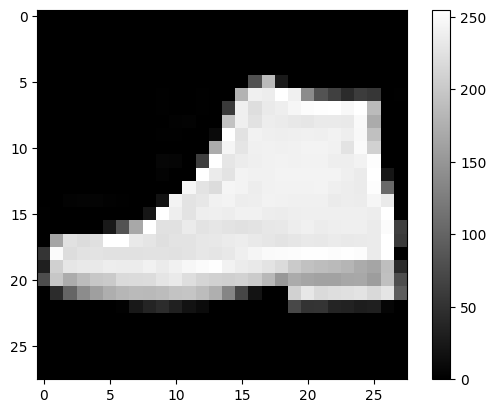

9

In [4]:
### plot one of these images to see what it looks like by Matplotlib
import matplotlib.pyplot as plt

## The question num to study with. Fell free to change up to 59999
data_idx = 42

## see the image
# try this same to valid images
plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[data_idx] # 9==Ankle boot, which is correct.

### Building a Neuron
- Defining the architecture
- Intiating training
- Evaluating the model

#### 1. Defining the archigtecture
Biological neurons transmit information a mechanism similar to Morse Code.
##### The Math
y = mx + b

As the computer guesses more and more answers to the questions we present it, it will update its variables to better fit the line to the data it has seen.
Neurons are often exposed to multivariate data. We're going to build a neuron that takes each pixel value(which is 0 and 255), and assign it a weight.

In [5]:
valid_images[data_idx] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,  26,  10,   5,   5,   5,
          3,   4,   4,   3,   6,  24,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 196, 203, 201, 234, 237,
        233, 231, 229, 196, 190, 207,  73,   0,   3,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   5, 195, 199, 194, 189, 192,
        188, 186, 186, 189, 180, 194,  67,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  32, 202, 195, 193, 186, 193,
        187, 186, 183, 189, 175, 197, 105,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  53, 208, 191, 190, 183, 190,
        188, 186, 184, 186, 167, 195, 132,   0,   1,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  75, 210, 191, 190, 184, 191,
        189, 184, 184, 185, 169, 190, 157,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
### We will use the Sequential API, which allows us to stack layers
### the list of operations we will be applying to our data as it is fed through the network.
number_of_classes = train_labels.max()+1 # 0-9
# number_of_classes

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # Converts multidimensional data into 1 dementional data
    tf.keras.layers.Dense(number_of_classes) # A row of neurons
])

### Verifying the model
model.summary()

### see if this make sense
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights # 2840 => bias is 10

/Users/gwonsoryeong/Desktop/goorm_python/Final_Project/ChatGPT_Interview_Bot/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

7840

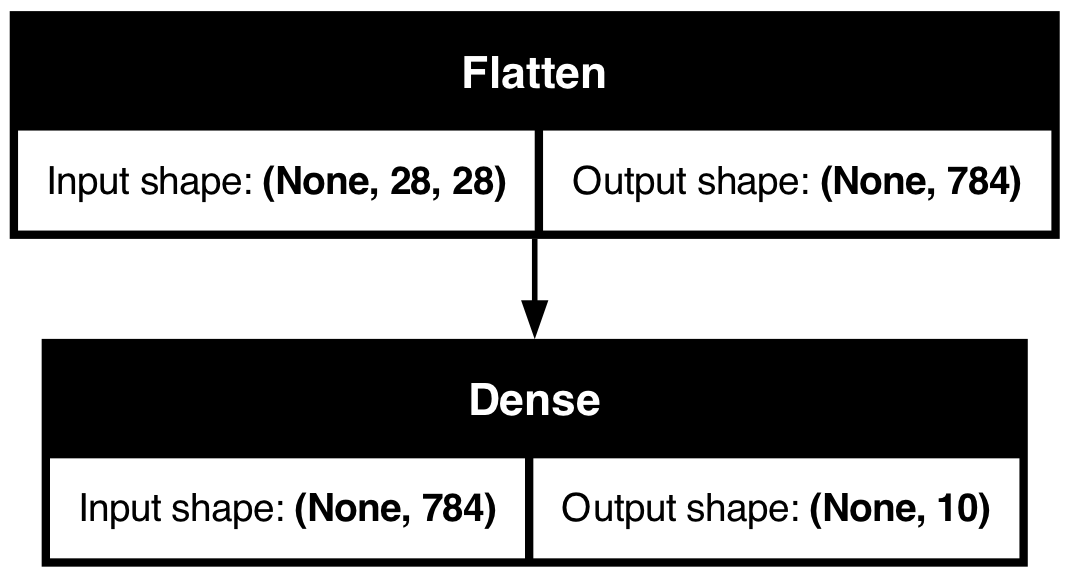

In [7]:
### other ways to verify our model
# downloaded the graphviz ($ brew install graphviz )
tf.keras.utils.plot_model(model, show_shapes=True)

### 2. Initiate Training
- Sparse : how our label is an integer index for our categories
- Categorical : this function made for classification
- Cross-entropy : the more confident our model is when it makes an incorrect guess, the worse its score will be.
- from-logits : the linear output will be transformed into a probability which can be interpreted as the model's confidence that a particular category is the correct one for the given input.

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 3. Evaluating the model
The below fit method will both help our model study and quiz it.

In [9]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.6842 - loss: 25.7209 - val_accuracy: 0.7729 - val_loss: 15.0917
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.7917 - loss: 12.0939 - val_accuracy: 0.7876 - val_loss: 11.0193
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.7936 - loss: 11.3221 - val_accuracy: 0.7576 - val_loss: 16.2951
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 861us/step - accuracy: 0.8005 - loss: 10.8962 - val_accuracy: 0.7984 - val_loss: 9.9407
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.7952 - loss: 11.1198 - val_accuracy: 0.7537 - val_loss: 14.6429


In [11]:
### prediction
model.predict(train_images[0:10]) # raw results => need some formattingj to be interpreted by the average human

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[ -344.8403  ,  -435.0548  ,  -218.61385 ,  -386.22626 ,
         -434.3667  ,   241.7879  ,   -70.63126 ,   146.4825  ,
          -24.589525,   569.43335 ],
       [  385.9764  ,  -302.48416 ,   256.73352 ,   165.48831 ,
          -64.17398 , -1287.0062  ,   300.5154  , -1728.867   ,
         -192.17195 , -1112.3324  ],
       [   81.54838 ,    33.43421 ,    91.36582 ,   158.23949 ,
           59.64866 ,  -491.22443 ,    89.712006,  -489.55496 ,
          -66.36041 ,  -327.52615 ],
       [  216.55183 ,   101.84361 ,   204.50682 ,   293.77643 ,
          118.231094,  -724.3522  ,   224.35042 ,  -935.02924 ,
         -103.700096,  -822.751   ],
       [   77.848434,   172.92064 ,    87.38623 ,   258.07275 ,
           85.75529 ,  -985.4655  ,   113.53769 ,  -783.42004 ,
         -125.59767 ,  -896.5796  ],
       [  213.47005 ,   -61.283714,   386.60156 ,    81.18665 ,
          173.68697 ,  -827.27    ,   278.40833 , -1536.7109  ,
          -76.443275, -1392.133   ],
       [ -

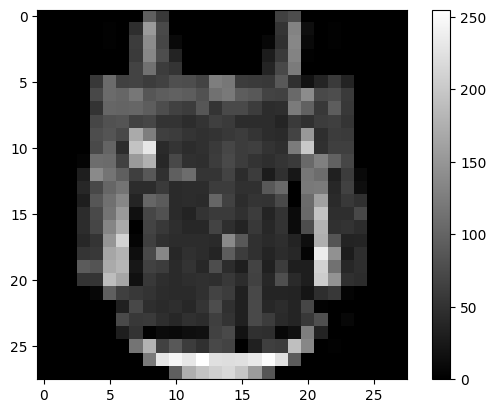

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


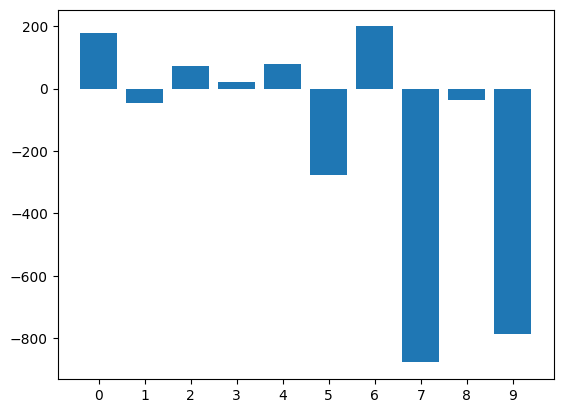

correct answer: 6


In [15]:
data_idx = 8675 # the question number to study with. Feel free to change up to 59999

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values=range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])